# 정리!!!
- 연도별 변화를 비교할 수 없다
  - 데이터 갱신이 되지 않았다
  - 24년에 값이 감소하는 것처럼 보이지만, 24년의 경우 1분기에서 3분기까지의 데이터만 있다
  
- 젠트리, 비젠트리, 기본상권지별로 월평균소득금액과 지출금액을 비교
  - 월평균소득금액: 비젠트리-젠트리가 소득금액이 기본상권지에 비해 높은 편
  - 지출총금액: 오히려 기본상권지가 가장 높은 편, 그리고 모든 ooo지출금액의 순위 및 양상 동일

- 따라서, 해당 데이터로는 젠트리피케이션 지역의 평균 소득 소비가 증가할 것이다라는 가설을 증명할 수 없다. 또한, 젠트리, 비젠트리, 기본상권 비교를 했을때 기본상권지보다 젠트리, 비젠트리 지역의 평균소득이 높긴 하나 비젠트리가 젠트리보다 약간더 평균 소득 소비가 높다.

- 유의미한 인사이트 도출이 어렵다고 판단... 더 좋은 아이디어 있으면 알려주세여ㅠㅠ

In [ ]:
!sudo apt-get update -qq
!sudo apt-get install -y fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [ ]:
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sangkwon = pd.read_csv('/content/drive/MyDrive/젠트리피케이션/데이터/상권_500m_읍면동.csv', encoding='cp949')
baehoo = pd.read_csv('/content/drive/MyDrive/젠트리피케이션/데이터/상권배후지_500m_읍면동.csv', encoding='cp949')

In [ ]:
consump = pd.read_csv('/content/drive/MyDrive/젠트리피케이션/데이터/소득소비/서울시 상권분석서비스(소득소비-상권).csv', encoding='cp949')
consump_ = pd.read_csv('/content/drive/MyDrive/젠트리피케이션/데이터/소득소비/서울시 상권분석서비스(소득소비-상권배후지).csv', encoding='cp949')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/젠트리피케이션/데이터/상권_젠트리카테고리_추가.csv', encoding='UTF-8')

In [ ]:
# 상권과 배후지 병합
consumpf = pd.concat([consump, consump_])

In [ ]:
data[['주소명', '카테고리', '상권코드명']]

,주소명,카테고리,상권코드명
0,강남역,비젠트리피케이션,강남역
1,강남역,비젠트리피케이션,역삼역
2,강남역,비젠트리피케이션,신논현역
3,강남역,비젠트리피케이션,국기원
4,압구정로데오,비젠트리피케이션,성수대교남단
...,...,...,...
210,이수역,젠트리피케이션,방배노인종합복지관(이수중학교)
211,이수역,젠트리피케이션,이수역 5번
212,용리단길,젠트리피케이션,신용산역(용산역)
213,용리단길,젠트리피케이션,삼각지역


In [ ]:
consumpf.columns

Index(['기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드', '상권_코드_명', '월_평균_소득_금액',
       '소득_구간_코드', '지출_총금액', '식료품_지출_총금액', '의류_신발_지출_총금액', '생활용품_지출_총금액',
       '의료비_지출_총금액', '교통_지출_총금액', '여가_지출_총금액', '문화_지출_총금액', '교육_지출_총금액',
       '유흥_지출_총금액'],
      dtype='object')

In [ ]:
consumpf.isna().sum()

,0
기준_년분기_코드,0
상권_구분_코드,0
상권_구분_코드_명,0
상권_코드,0
상권_코드_명,0
월_평균_소득_금액,174
소득_구간_코드,174
지출_총금액,4089
식료품_지출_총금액,4089
의류_신발_지출_총금액,4089


In [ ]:
df = data[['주소명', '카테고리', '상권코드명']].merge(consumpf, left_on='상권코드명', right_on='상권_코드_명', how='right')

In [ ]:
df[df['월_평균_소득_금액'].isna()]['상권_코드_명'].unique()

array(['신림주공2단지(광신고등학교)', '롯데백화점(시청광장 지하쇼핑센터)', '문래역(문래로데오거리)',
       '상계역전종합상가', '남서울상가', '봉일시장', '청담삼익시장', '삼익패션타운(남대문시장)', '신아타운'],
      dtype=object)

In [ ]:
df['카테고리'] = df['카테고리'].fillna('기본상권지')

In [ ]:
df['연도'] = df['기준_년분기_코드'].astype(str).str[:4]

# 젠트리, 비젠트리, 기본 비교

In [ ]:
df.columns

Index(['주소명', '카테고리', '상권코드명', '기준_년분기_코드', '상권_구분_코드', '상권_구분_코드_명', '상권_코드',
       '상권_코드_명', '월_평균_소득_금액', '소득_구간_코드', '지출_총금액', '식료품_지출_총금액',
       '의류_신발_지출_총금액', '생활용품_지출_총금액', '의료비_지출_총금액', '교통_지출_총금액', '여가_지출_총금액',
       '문화_지출_총금액', '교육_지출_총금액', '유흥_지출_총금액', '연도'],
      dtype='object')

In [ ]:
df[df['연도']=='2024']['기준_년분기_코드'].unique()

array([20241, 20242, 20243])

## 연도별 카테고리별 월평균소득금액 비교
- 20년 이후로 데이터 갱신 안됨
- 기본상권지보다 젠트리, 비젠트리 지역의 소득 금액 훨씬 높다

In [ ]:
def line_plot(df, col):

    # 연도와 카테고리별 월_평균_소득_금액 평균 계산
    trend = df.groupby(['연도', '카테고리'])[col].mean().reset_index()

    # 라인 플롯 그리기
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=trend, x='연도', y=col, hue='카테고리', marker='o')

    # 그래프 제목 및 라벨 설정
    plt.title(f'연도별 카테고리별 {col} 변화', fontsize=14)
    plt.xlabel('연도', fontsize=12)
    plt.ylabel('월 평균 소득 금액', fontsize=12)
    plt.legend(title='카테고리', fontsize=10)
    plt.grid(True)
    plt.show()


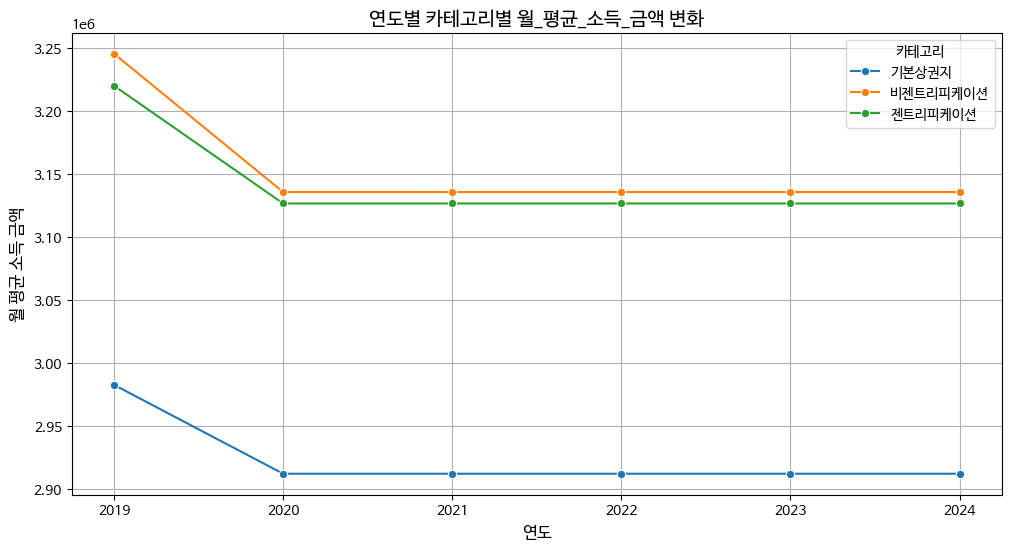

In [ ]:
line_plot(df, '월_평균_소득_금액')

## 연도별 카테고리별 지출총금액 비교
- 23년까지 데이터 갱신 안됨
- 비젠트리에서 지출총금액 가장 낮다
- 교통지출총금액, 문화지출총금액도 같은 양상

In [ ]:
def plot_multiple_trends(df, columns):

    # 서브플롯 크기 설정 (3행 4열)
    fig, axes = plt.subplots(3, 4, figsize=(20, 15))
    axes = axes.flatten()  # 2D 배열을 1D 리스트로 변환

    for i, col in enumerate(columns):
        # 연도와 카테고리별 선택한 칼럼의 평균 계산
        trend = df.groupby(['연도', '카테고리'])[col].mean().reset_index()

        # 각 서브플롯에 라인 플롯 그리기
        sns.lineplot(data=trend, x='연도', y=col, hue='카테고리', marker='o', ax=axes[i])

        # 그래프 제목 및 라벨 설정
        axes[i].set_title(f'{col} 변화', fontsize=12)
        axes[i].set_xlabel('연도', fontsize=10)
        axes[i].set_ylabel(f'{col} 평균', fontsize=10)
        axes[i].legend(title='카테고리', fontsize=8)
        axes[i].grid(True)

    # 빈 플롯 숨기기 (칼럼 개수가 12 미만일 경우)
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # 서브플롯 간 간격 조정
    plt.tight_layout()
    plt.show()


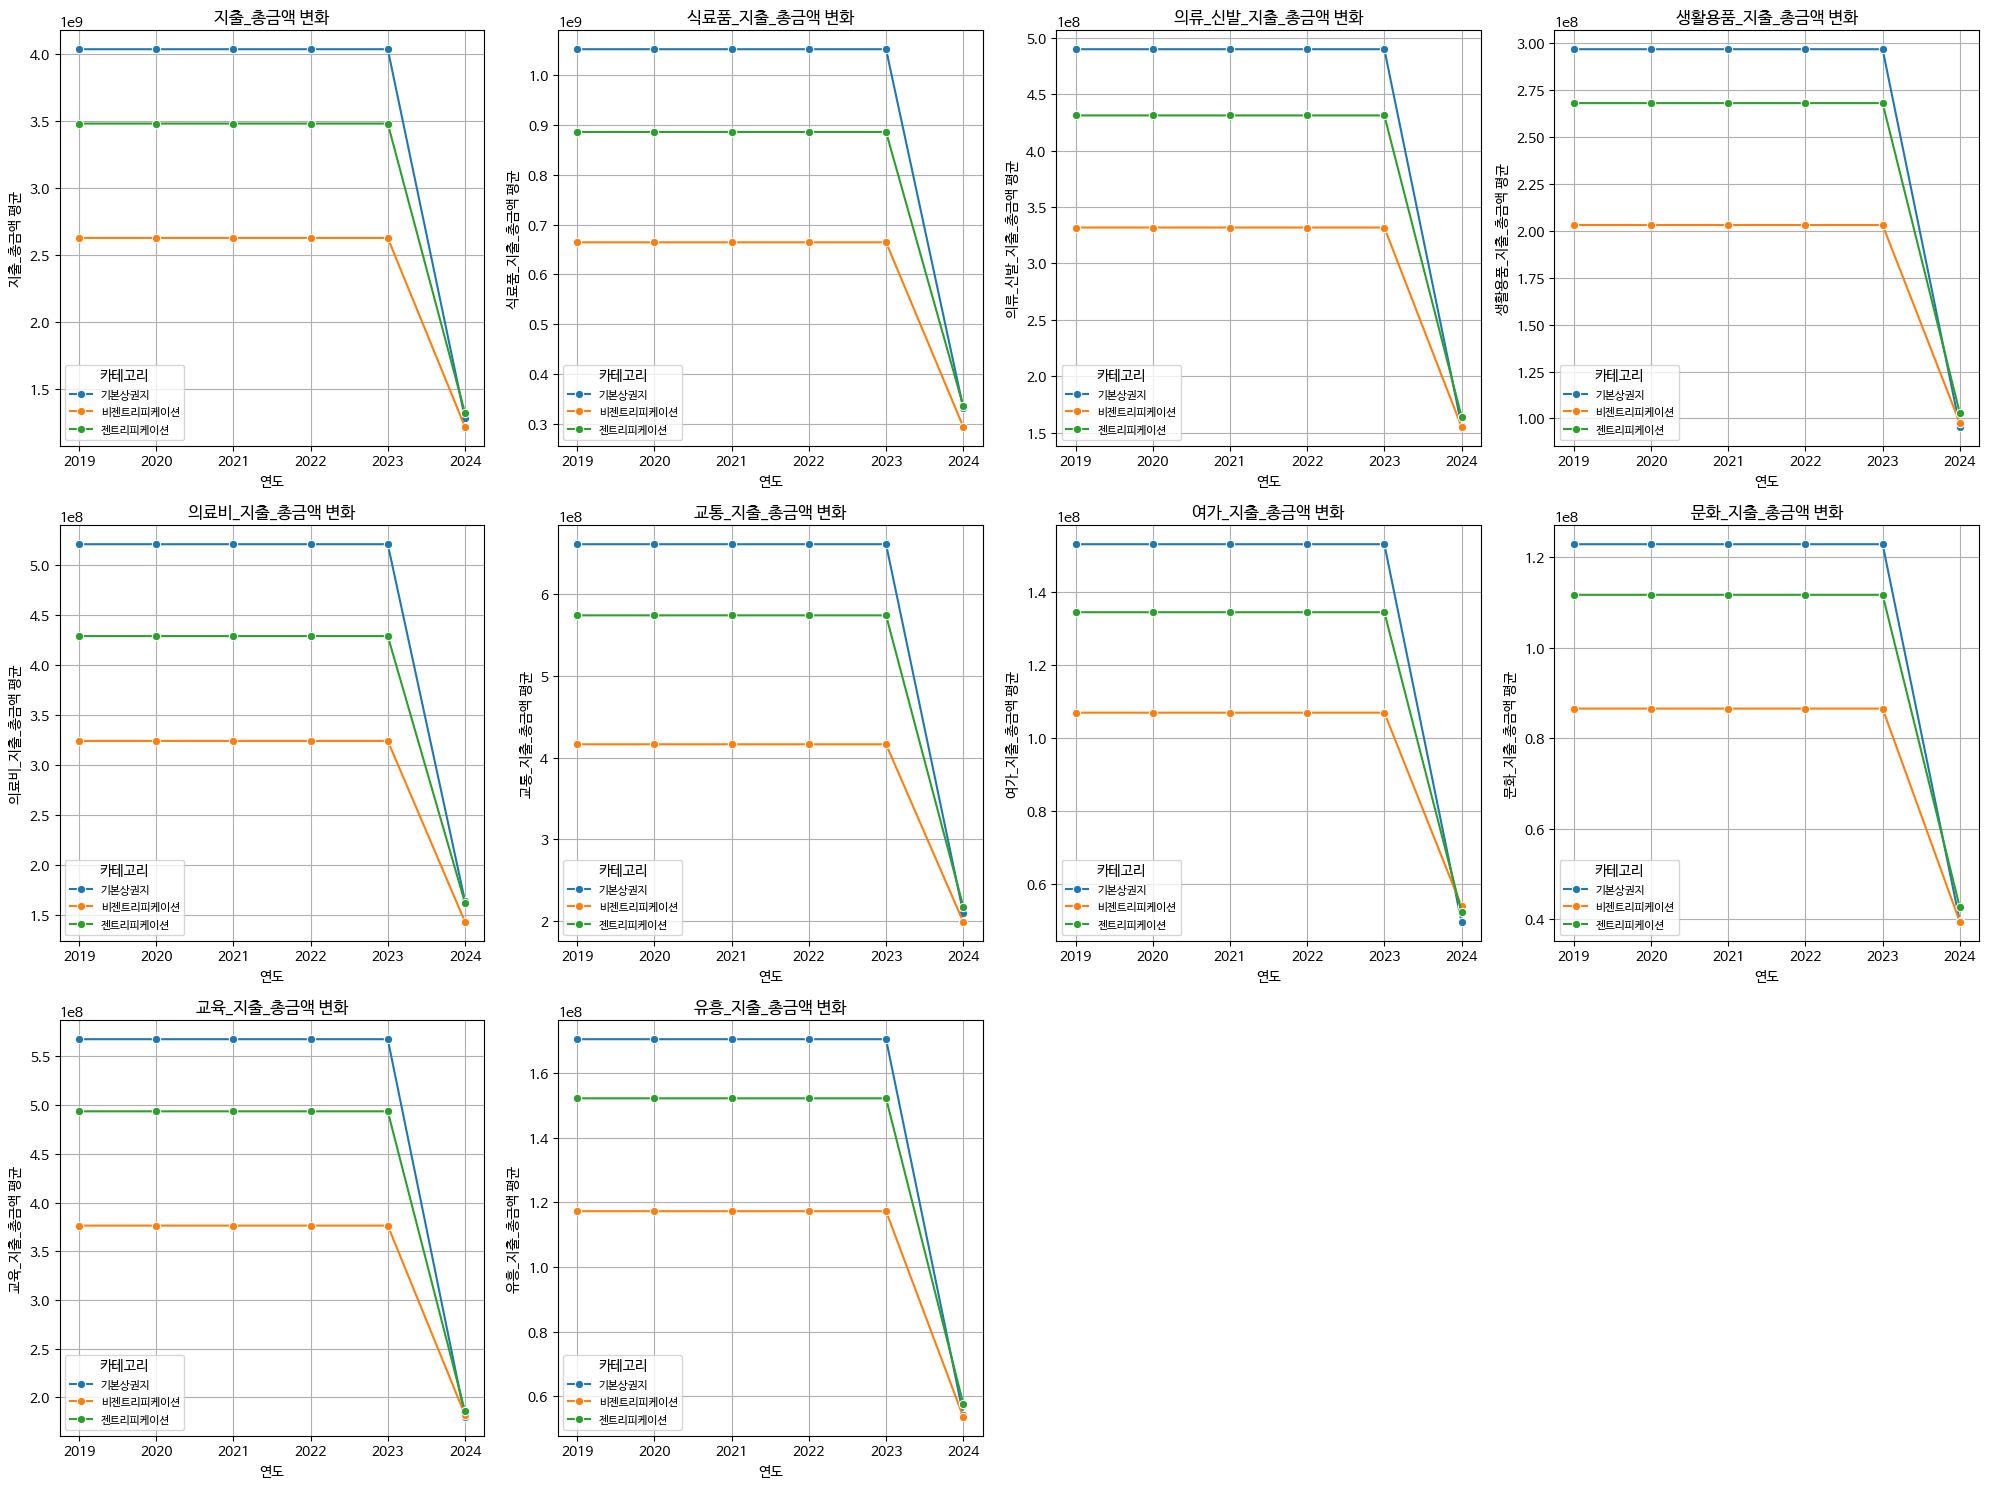

In [ ]:
columns_to_visualize = ['지출_총금액', '식료품_지출_총금액', '의류_신발_지출_총금액',
                        '생활용품_지출_총금액', '의료비_지출_총금액', '교통_지출_총금액', '여가_지출_총금액',
                        '문화_지출_총금액', '교육_지출_총금액', '유흥_지출_총금액']

plot_multiple_trends(df, columns_to_visualize)

데이터 갱신이 잘 되지 않은 관계로 연도별 변화를 보는 것은 무의미하다고 판단

In [ ]:
zen = df[df['카테고리']=='젠트리피케이션']
nozen = df[df['카테고리']=='비젠트리피케이션']
normal = df[df['카테고리']=='기본상권지']

# 젠트리 내에서 월평균소득금액 높은 순으로 정렬
- 2019년과 2024년을 비교했을 때 순위 변동 크게 없다

In [ ]:
zen[zen['연도']=='2019'].groupby('주소명')['월_평균_소득_금액'].mean().sort_values(ascending=False)

,월_평균_소득_금액
주소명,
서촌,4.163309e+06
용리단길,4.136061e+06
신사동 가로수길,3.748379e+06
북촌,3.629868e+06
경리단길,3.598102e+06
합정,3.451966e+06
이수역,3.401084e+06
명동,3.357282e+06
대학로(혜화역),3.230633e+06


In [ ]:
zen[zen['연도']=='2024'].groupby('주소명')['월_평균_소득_금액'].mean().sort_values(ascending=False)

,월_평균_소득_금액
주소명,
용리단길,4.091513e+06
서촌,4.033971e+06
신사동 가로수길,3.604112e+06
경리단길,3.466639e+06
북촌,3.425688e+06
이수역,3.292964e+06
명동,3.288108e+06
합정,3.252167e+06
문래,3.157040e+06


# 젠트리 내에서 지출총금액 높은 순으로 정렬

In [ ]:
zen[zen['연도']=='2019'].groupby('주소명')['지출_총금액'].mean().sort_values(ascending=False)

,지출_총금액
주소명,
송리단길,7.616402e+09
신림,5.983976e+09
이수역,5.008238e+09
연남,4.563694e+09
해방촌(이태원 근처),4.209533e+09
합정,3.865613e+09
경리단길,3.626465e+09
홍대입구역,3.597809e+09
성수동,3.362480e+09


# 비젠트리내에서 정렬

In [ ]:
nozen[nozen['연도']=='2019'].groupby('주소명')['월_평균_소득_금액'].mean().sort_values(ascending=False)

,월_평균_소득_금액
주소명,
여의도역,6.341916e+06
청담,5.204507e+06
잠실역,5.124064e+06
압구정로데오,4.357558e+06
강남역,3.871800e+06
사당,3.291874e+06
회기역,2.837291e+06
영등포,2.808892e+06
동대문(DDP),2.687738e+06


In [ ]:
nozen[nozen['연도']=='2019'].groupby('주소명')['지출_총금액'].mean().sort_values(ascending=False)

,지출_총금액
주소명,
잠실역,7.966035e+09
사당,5.342472e+09
건대입구역,3.354561e+09
회기역,3.072680e+09
강남역,2.977774e+09
청담,2.392950e+09
영등포,2.067398e+09
여의도역,1.447282e+09
압구정로데오,1.251940e+09


# 주소명별 월평균소득금액 2019와 2024 비교
- 24년은 전체 데이터 쌓이지 않아서 의미 없다...

In [ ]:
def plot_comparison(zen, col):
    """
    2019년과 2024년의 주소명별 지출 총금액 평균을 비교하는 막대 그래프를 그리는 함수.

    Parameters:
    zen (DataFrame): 연도, 주소명, 지출_총금액 컬럼을 포함하는 데이터프레임

    Returns:
    None
    """
    # 2019년과 2024년의 주소명별 col 평균 계산
    exp_2019 = zen[zen['연도'] == '2019'].groupby('주소명')[col].mean().reset_index()
    exp_2024 = zen[zen['연도'] == '2024'].groupby('주소명')[col].mean().reset_index()

    # 연도 컬럼 추가
    exp_2019['연도'] = '2019'
    exp_2024['연도'] = '2024'

    # 두 데이터프레임 병합
    exp_combined = pd.concat([exp_2019, exp_2024])

    # 막대 그래프 그리기
    plt.figure(figsize=(14, 6))
    sns.barplot(data=exp_combined, x='주소명', y=col, hue='연도')

    # 그래프 제목 및 라벨 설정
    plt.title('2019년 vs 2024년 주소명별 지출 총금액 평균 비교', fontsize=14)
    plt.xlabel('주소명', fontsize=12)
    plt.ylabel(f'{col} 평균', fontsize=12)
    plt.xticks(rotation=45)  # X축 라벨 가독성을 위해 회전
    plt.legend(title='연도', fontsize=10)
    plt.grid(axis='y')

    # 그래프 표시
    plt.show()


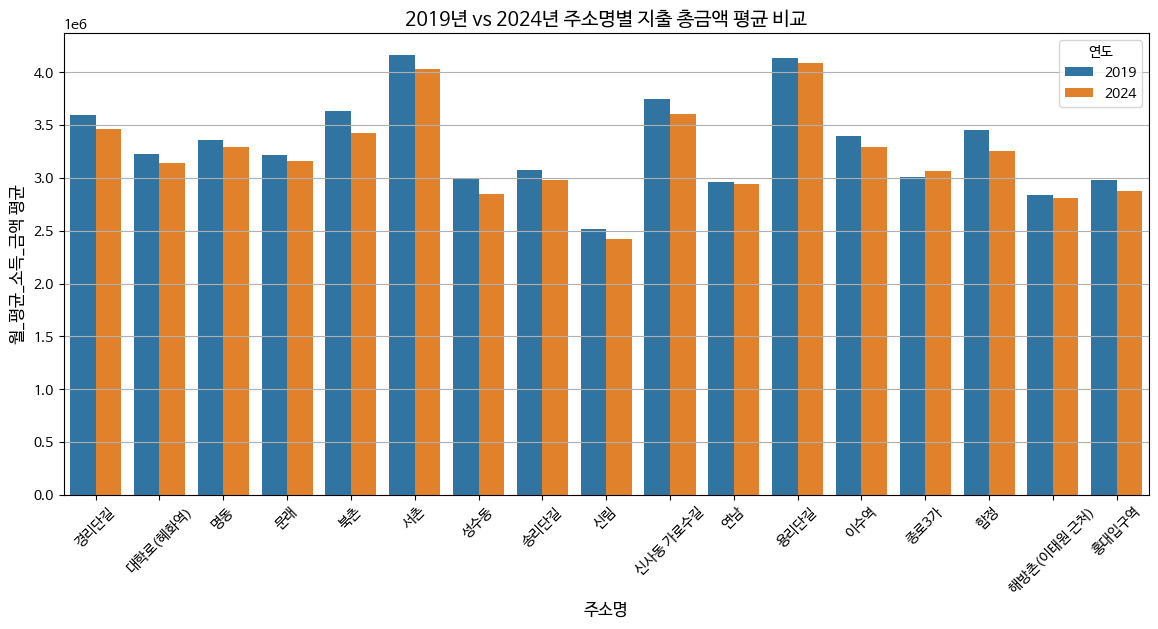

In [ ]:
plot_comparison(zen, '월_평균_소득_금액')